<a href="https://colab.research.google.com/github/Pranali-25/Capstone-Project/blob/main/3_Recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RECURRENT NEURAL NETWORK (RNNs)**

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other. Still, in cases when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue with the help of a Hidden Layer.

The main and most important feature of RNN is its Hidden state, which remembers some information about a sequence. The state is also referred to as Memory State since it remembers the previous input to the network. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters, unlike other neural networks.


# **1.Importing libraries**

Firstly, We have to import the necessary libraries and prepare the MNIST dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


# **2.Defining the model**

Define a simple RNN model using Keras.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten

model = Sequential([
    SimpleRNN(128, input_shape=(28, 28), return_sequences=True),
    SimpleRNN(128),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 28, 128)           20096     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 54282 (212.04 KB)
Trainable params: 54282 (212.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **3.Training the model**

Train the RNN model.

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 41s 26ms/step - loss: 0.3376 - accuracy: 0.8964 - val_loss: 0.1892 - val_accuracy: 0.9449
Epoch 2/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2003 - accuracy: 0.9420 - val_loss: 0.2747 - val_accuracy: 0.9180
Epoch 3/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1784 - accuracy: 0.9476 - val_loss: 0.1597 - val_accuracy: 0.9571
Epoch 4/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1533 - accuracy: 0.9553 - val_loss: 0.1543 - val_accuracy: 0.9571
Epoch 5/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1512 - accuracy: 0.9562 - val_loss: 0.1307 - val_accuracy: 0.9625
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1622 - accuracy: 0.9533 - val_loss: 0.1998 - val_accuracy: 0.9442
Epoch 7/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1591 - accuracy: 0.9528 - val_loss: 0.1637 -

# **4.Visualization**


Visualize some predictions.

1/1 [==============================] - 0s 326ms/step


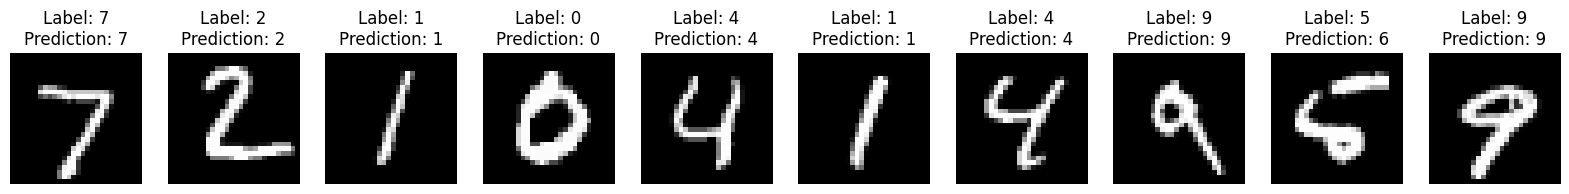

In [ ]:
def plot_images(images, labels, predictions=None):
    n = len(images)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        title = f"Label: {np.argmax(labels[i])}"
        if predictions is not None:
            title += f"\nPrediction: {np.argmax(predictions[i])}"
        plt.title(title)
        plt.axis('off')
    plt.show()

# Get some test images and labels
num_images = 10
test_images = x_test[:num_images]
test_labels = y_test[:num_images]

# Predict the labels for the test images
predictions = model.predict(test_images)

# Plot the images with their true labels and predictions
plot_images(test_images, test_labels, predictions)


# **CONCLUSION**

The code demonstrates how to build, train, and evaluate a Recurrent Neural Network (RNN) using TensorFlow and Keras to recognize handwritten digits from the MNIST dataset.  Firstly, we import the necessary libraries. Then, we prepare the MNIST dataset. Next, we define the RNN model.Later we train the model using the training data and finally visualize its performance on new data. This step-by-step approach provides a clear and basic understanding of RNNs.